In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from GeneticFeatures.GeneticFeatureGenerator import *
from GeneticFeatures.Node import *

from tester import *

In [20]:
def add(x, y):
    return x + y

def sub(x, y):
    return x - y

def mul(x, y):
    return x * y

def div(x, y):
    return x / (y + 1e-10)

def hyp(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.hypot(x, y)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.hypot(x, y)

def log(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.log(np.hypot(x, y) + 1e-10)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.log(np.hypot(x, y) + 1e-10)

In [21]:
generator = GeneticFeatureGenerator(
    [add, sub, mul, div, hyp, log],
    operation_names = ["+", "-", "*", "/", "hyp", "log"],
    popsize = 120, 
    maxiter = 200, 
    mutation_rate = 0.05,
    max_tree_depth = 8,
)

In [22]:
dataset = pd.read_csv("csv/adm_data.csv")
dataset.dropna(inplace=True)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [23]:
tester = tester(X, y, generator, 8, 1, 400, verbose = True, test_size = 0.3, random_state = 17)

Split:  0 Feature:  0
Iteration:  199 Best fitness:  0.627520759193357 Generation best 0.6255309378946166
Split:  0 Feature:  1
Iteration:  199 Best fitness:  0.6266023801323997 Generation best 0.6153522366356714
Split:  0 Feature:  2
Iteration:  199 Best fitness:  0.6285156698427277 Generation best 0.5872268778938508
Split:  0 Feature:  3
Iteration:  199 Best fitness:  0.6285922014311407 Generation best 0.6267554433092261
Split:  0 Feature:  4
Iteration:  199 Best fitness:  0.6312708070255998 Generation best 0.6272146328397046
Split:  0 Feature:  5
Iteration:  199 Best fitness:  0.6294723146978916 Generation best 0.6224696743580913
Split:  0 Feature:  6
Iteration:  199 Best fitness:  0.6297401752573375 Generation best 0.6222400795928525
Split:  0 Feature:  7
Iteration:  199 Best fitness:  0.6279799487238358 Generation best 0.5879921937779818


In [24]:
for tree in tester.trees:
    tree.root.update_depth(1)
    print(tree.root.get_max_depth())

8
5
8
8
7
8
7
8


In [25]:
tester.test_models(notests=30)

Iteration 4 - MSE 0.004368014689011189, R2 0.8246762500386438, MAE 0.04634743333168497, NEW_MSE 0.004262256686997164, NEW_R2 0.8289211738362139, NEW_MAE 0.04509627383077035
Iteration 9 - MSE 0.004368014689011189, R2 0.8246762500386438, MAE 0.04634743333168497, NEW_MSE 0.004262256686997164, NEW_R2 0.8289211738362139, NEW_MAE 0.04509627383077035
Iteration 14 - MSE 0.004368014689011189, R2 0.8246762500386438, MAE 0.04634743333168497, NEW_MSE 0.004262256686997164, NEW_R2 0.8289211738362139, NEW_MAE 0.04509627383077035
Iteration 19 - MSE 0.004368014689011189, R2 0.8246762500386438, MAE 0.04634743333168497, NEW_MSE 0.004262256686997164, NEW_R2 0.8289211738362139, NEW_MAE 0.04509627383077035
Iteration 24 - MSE 0.004368014689011189, R2 0.8246762500386438, MAE 0.04634743333168497, NEW_MSE 0.004262256686997164, NEW_R2 0.8289211738362139, NEW_MAE 0.04509627383077035
Iteration 29 - MSE 0.004368014689011189, R2 0.8246762500386438, MAE 0.04634743333168497, NEW_MSE 0.004262256686997164, NEW_R2 0.8289

In [26]:
tester.get_tests()

,Model,MSE,R2,MAE,NEW_MSE,NEW_R2,NEW_MAE
0,RandomForestRegressor,0.004368,0.824676,0.046347,0.004262,0.828921,0.045096
1,SGDRegressor,0.004471,0.820546,0.046450,0.004366,0.824743,0.046787
2,GradientBoostingRegressor,0.006944,0.721282,0.053167,0.006123,0.754244,0.056240


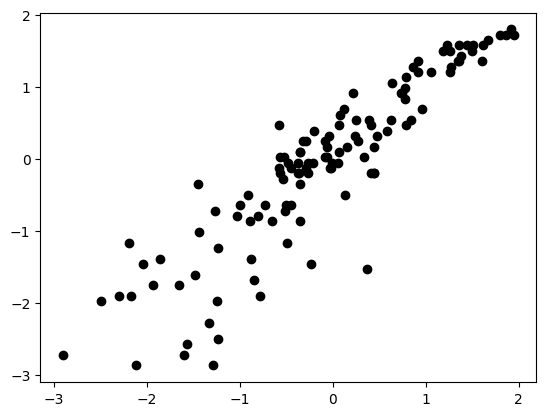

Min:  -2.9068819120529055 Max:  1.945691982062475 Mean:  -0.09021295588839061 Std:  1.0647784835022815


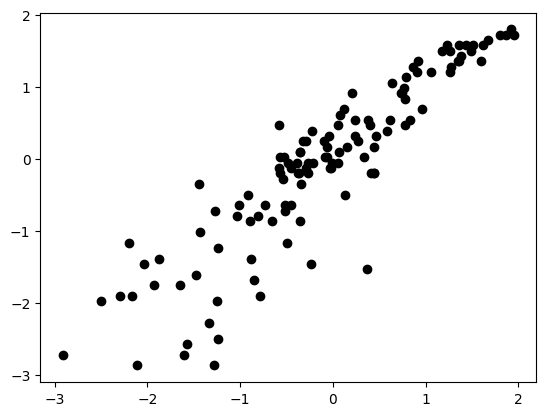

Min:  -2.9123203653361083 Max:  1.950899491219845 Mean:  -0.09020470789609719 Std:  1.0645993431216219


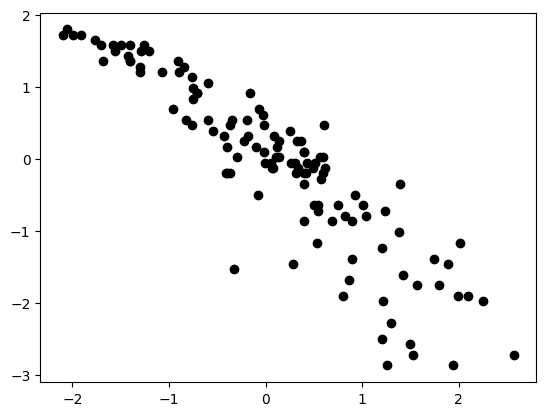

Min:  -2.0980011415929845 Max:  2.5677960013440106 Mean:  0.08364302045195324 Std:  1.045952427285696


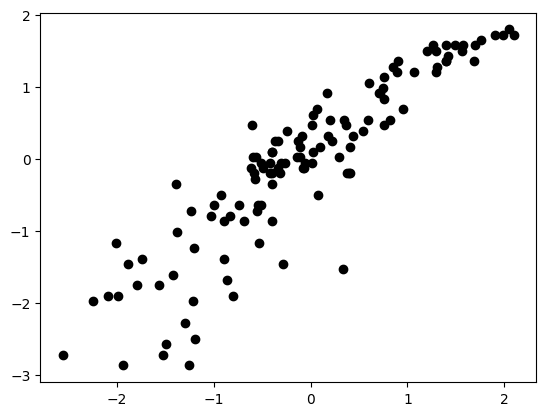

Min:  -2.5621244009040613 Max:  2.097416954330839 Mean:  -0.08368252925789607 Std:  1.0457030136688628


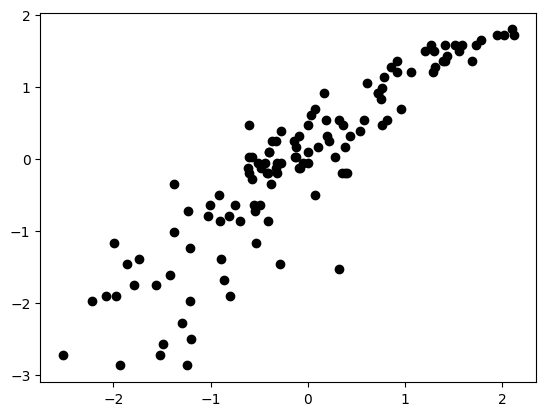

Min:  -2.5204441744632615 Max:  2.1149676893355096 Mean:  -0.08237824161520332 Std:  1.045264853817421


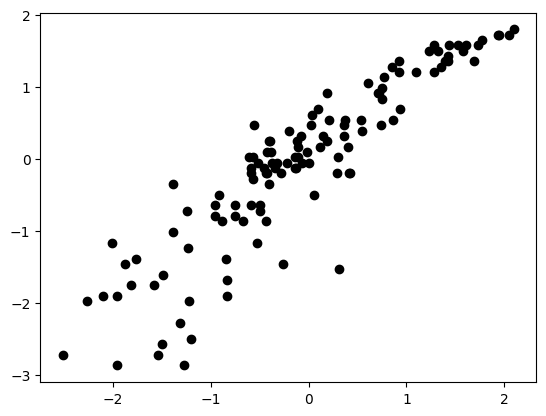

Min:  -2.5084448060231743 Max:  2.094361893608734 Mean:  -0.07957721980107836 Std:  1.0470966444877627


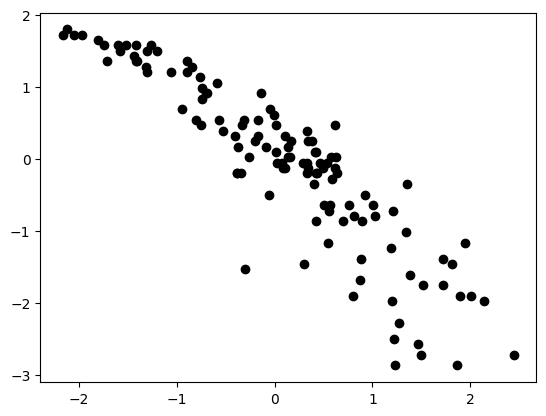

Min:  -2.1668760353618013 Max:  2.443857762619762 Mean:  0.08117782383842208 Std:  1.0389572474033735


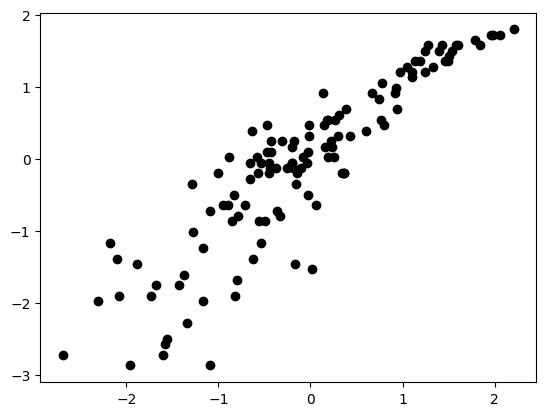

Min:  -2.689378403370401 Max:  2.207226074121524 Mean:  -0.06851869293433752 Std:  1.063357775919565


In [27]:
for i in range(tester.X_test.shape[1],tester.new_X_test.shape[1]):
    plt.clf()
    plt.scatter(tester.new_X_test[:,i], tester.y_test, color = 'black')
    plt.show()
    print("Min: ", tester.new_X_test[:, i].min(), "Max: ", tester.new_X_test[:, i].max(), "Mean: ", tester.new_X_test[:, i].mean(), "Std: ", tester.new_X_test[:, i].std())